# Проект: приоритизация гипотез и А/В тесты

### Описание проекта
#### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

#### Описание данных
**Данные для первой части**  
*Файл /datasets/hypothesis.csv*   
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

**Данные для второй части**  
*Файл /datasets/orders.csv*    
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

*Файл /datasets/visitors.csv*      
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.  

### Загрузим данные для 1 части проекта

In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


#### Предобработка данных

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

**Вывод**  
Данные чистые и готовы к исследованию.  
Таблица **hypothesis** содержит в себе данные 5 столбцов:  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Часть 1. Приоритизация гипотез.  
В hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача:  
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
# посчитаем ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
# отсортируем по убыванию приоритета
hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [8]:
hypothesis.duplicated().sum()

0

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [9]:
# посчитаем RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [10]:
hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

После применения RICE приоритизация гипотез изменилась, гипотеза 7 встала на первое место в списке, благодаря наибольшему охвату, не смотря на то, что после применения ICE эта гипотеза была на 3 месте.   
8 гипотеза после применения фреймворка ICE была на первом месте с самым высоким приоритетом, но после приоритизации RICE она переместила в середину списка, в связи добавления показателя охвата прльзователей.   
Изменения цвета главной страницы фона (4 гипотеза) в обоих варинатах остается на последнем месте.   

### Часть 2. Анализ A/B-теста

#### загрузим необходимые данные

In [11]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = pd.to_datetime(orders['date'])

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
orders.duplicated().sum()

0

In [15]:
visits = pd.read_csv('/datasets/visitors.csv')
visits['date'] = pd.to_datetime(visits['date'])

In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
visits.duplicated().sum()

0

**Вывод**  
Данные загружены и готовы к исследованию.  
Таблица **orders** содержит 5 столбцов:  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

Табоица **visits** содержит в себе данные 3 столбцов:  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.  

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [18]:
# создаем датафрейм уникальных пар значений дат и групп таблицы orders, удаляем дубликаты
dg = orders[['date', 'group']].drop_duplicates()

In [19]:
# аггрегированные кумулятивные по дням данные о заказах
ordersAggregated = dg.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique',
     'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [20]:
# аггрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = dg.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [21]:
# объединяем кумулятивные данные
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [22]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [23]:
# обьявим переменную cumulativeRevenueA, в которой сохраним данные о датах, выручке и числе заказов в группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

In [24]:
# обьявим переменную cumulativeRevenueB, в которой сохраним данные о датах, выручке и числе заказов в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

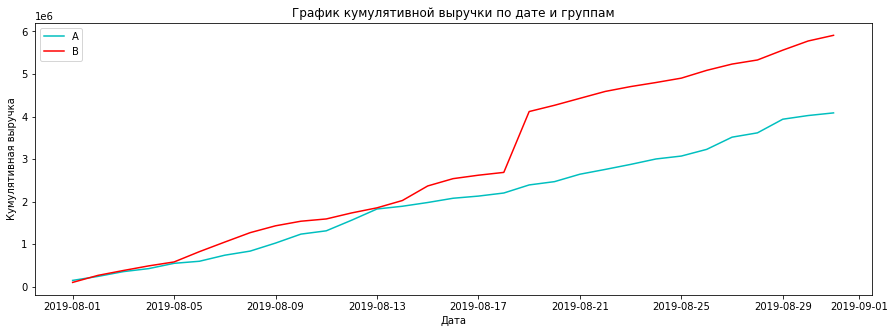

In [25]:
# строим график кумулятивной выручки по группам
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='c')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='r')
plt.title('График кумулятивной выручки по дате и группам')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.xticks(rotation=0)
plt.legend() 
plt.show()

**Вывод**  
Выручка у группы В увеличивается  на протяжении всего теста, также на графике видно резкий скачок у группы В, возможно, это резкое увеличение количества заказов или увеличение суммы заказов. 

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

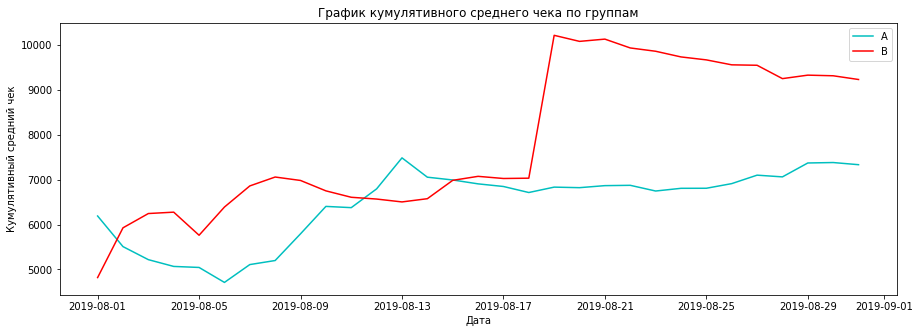

In [26]:
# строим график кумулятивного среднего чека по группам
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A', color='c')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B', color='r')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=0)
plt.legend() 
plt.show()

**Вывод**  
Средний чек группы А с середины и до конца периода стабилизировался, а показатель для группы В начал снижаться, при этом на графике видно резкий скачок группы В на 18-19 день, скорее всего в группу В попали крупные заказы. 

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [28]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


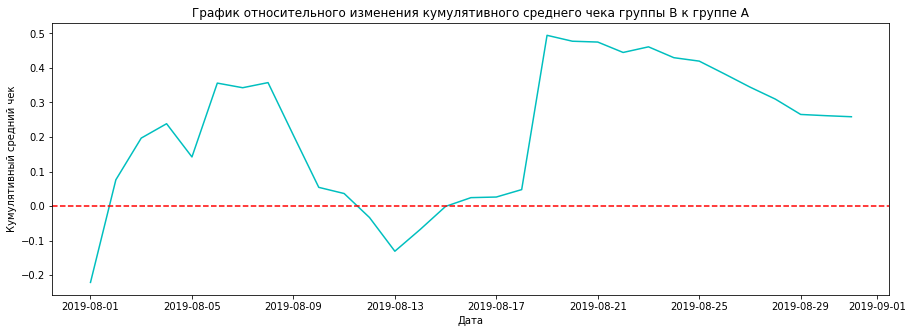

In [29]:
# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color='c')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=0)
plt.show()

**Вывод**  
График неравномерный, скорее всего где-то спрятались крупные заказы и выбросы. 

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [30]:
# добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData['conversion']

0     0.033380
1     0.029453
2     0.032885
3     0.034776
4     0.036856
        ...   
57    0.033657
58    0.030216
59    0.034070
60    0.029729
61    0.033834
Name: conversion, Length: 62, dtype: float64

In [31]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [32]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


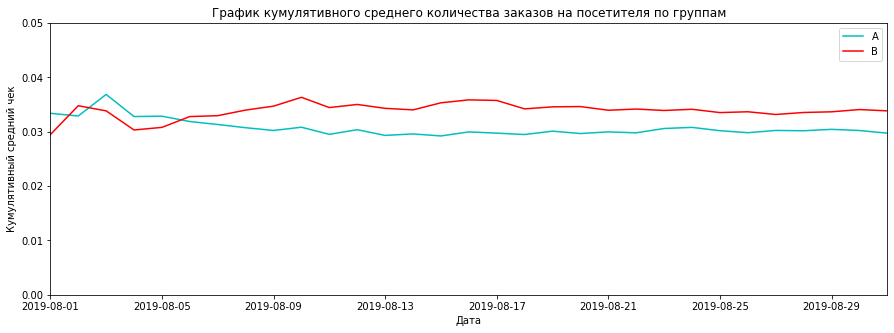

In [33]:
# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A',  color='c')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B',  color='r')
plt.axis([cumulativeDataA['date'].min(), cumulativeDataA['date'].max(), 0,.05])
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=0)
plt.show()

**Вывод**  
Оба графика идут параллельно друг другу, графики симметричны, также видно, что конверсия группы В выше конверсии группы А

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

In [34]:
# объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [35]:
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


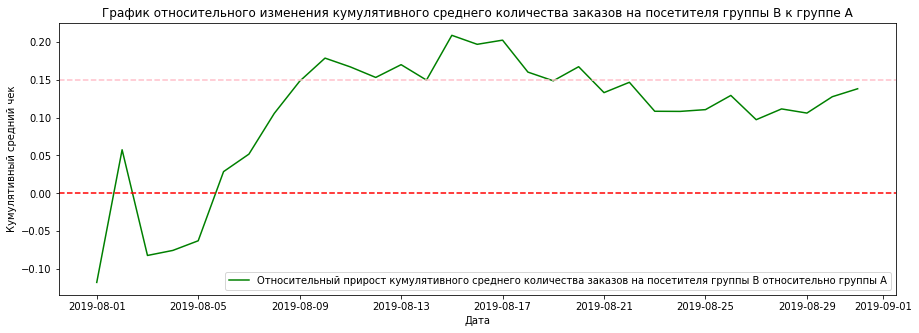

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, color ='g',label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y= 0.15, color='pink', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.show()

**Вывод**  
Отношение конверсии группы В к конверсии группы А в начале теста просело, затем график пошел вверх.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [37]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [38]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'transactionId']
print(ordersByUsers.head(10))

       visitorId  transactionId
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


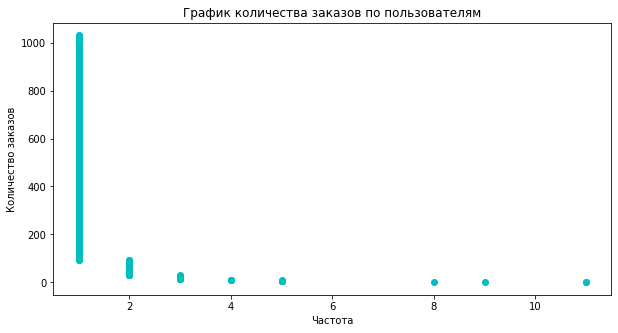

In [39]:
# построим точечный график количества заказов по пользователям
plt.figure(figsize=(10, 5))
y_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(ordersByUsers['transactionId'], y_values, c = 'c')
plt.title('График количества заказов по пользователям')
plt.xlabel('Частота')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**  
Большинство пользователей совершают 1-2 заказа.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 

In [40]:
# посчитаем и выведем 95й и 99й перцентили 
print('95 и 99 перцентили количества заказов:', np.percentile(ordersByUsers['transactionId'], [95, 99]))

95 и 99 перцентили количества заказов: [2. 4.]


**Вывод**  
Границей для определения аномальных пользователей выбираем покупателей, совершивших больше 2 покупок.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))

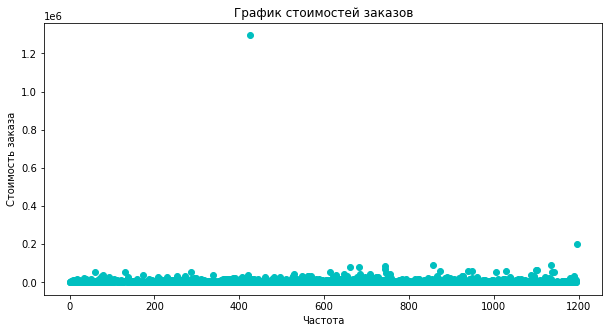

In [42]:
# построим точечный график количества заказов по пользователям
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'],  c = 'c')
plt.title('График стоимостей заказов')
plt.xlabel('Частота')
plt.ylabel('Стоимость заказа')
plt.show()

**Вывод**  
Большинство пользователей совершает покупки до 200000

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [43]:
# посчитаем и выведем 95й и 99й перцентили 
print('95 и 99 перцентили количества заказов:', np.percentile(orders['revenue'], [95, 99]))

95 и 99 перцентили количества заказов: [28000.  58233.2]


**Вывод**  
Границей для определения аномальных заказов будем считать покупки свыше 28000

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Определим нулевую и альтернативную гипотезу:  
H0: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным нет.  
H1: статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «сырым» данным есть.

In [44]:
# найдем количество посетителей в день для группы А
visitorsADaily = visits[visits['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [45]:
# найдем количество посетителей в день для группы В
visitorsBDaily = visits[visits['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [46]:
# найдем количество заказов и сумму покупок в день для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [47]:
# найдем количество заказов и сумму покупок в день для группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [48]:
# посчитаем количество пользователей, совершивших заказ группы А
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [49]:
# посчитаем количество пользователей, совершивших заказ группы B
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [50]:
# объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [51]:
# посчитаем статистическую значимость различия среднего количества заказов по результатам теста
# применим тест Манна-Уитни для проверки нулевой гипотезы о том, что распределения двух выборок одинаковы
alpha = 0.05 # уровень статистической значимости
p_value = st.mannwhitneyu(sampleA, sampleB)[1]
if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [52]:
# выведем p-value для сравнения среднего между группами, применим тест Манна-Уитни
print('P-Value: {0:.3f}'.format(p_value))
# посчитаем и выведем относительное различие в среднем между группами
print('Относительное различие в среднем между группой В и А: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

P-Value: 0.017
Относительное различие в среднем между группой В и А: 0.138


**Вывод**  
Статистически значимое различие в среднем значении между группами A и B существует, поэтому мы можем отвергнуть нулевую гипотезу.  
Группа B показывает лучшее среднее значение по сравнению с группой A, что свидетельствует о положительном эффекте изменений, проведенных в группе B.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Определим нулевую и альтернативную гипотезы:  
H0: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным А и В нет.  
H1: статистически значимые различия в среднем чеке заказа между группами по «сырым» данным А и В есть.  

In [53]:
# посчитаем статистическую значимость различия среднего количества заказов по результатам теста
# применим тест Манна-Уитни для проверки нулевой гипотезы, потому что он не требует нормальности данных и устойчив к выбросам.
alpha = 0.05 # уровень статистической значимости
p_value = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Не удалось отвергнуть нулевую гипотезу


In [54]:
print('P-value: {0:.3f}'.format(p_value))
print('Различие в среднем чеке заказа группы B и A: {0:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Различие в среднем чеке заказа группы B и A: 0.259


**Вывод**  
P-value 0.729 значительно выше стандартного порога 0.05, что означает, что нет статистически значимых различий между группами A и B. Мы не можем отвергнуть нулевую гипотезу о том, что средние чеки в обеих группах одинаковы.  
Также средний чек группы B на 26% больше среднего чека группы A.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Определим нулевую и альтернативную гипотезы:  
H0: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным нет.
H1: статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным есть.

In [55]:
# отфильтруем аномальных пользователей
# возьмем за аномальных пользователей тех, кто совершил 2 заказа и более, и совершил заказ на сумму свыше 28 000
# пользователи с большим количеством заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transactionId'], 95)]['userId'],ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transactionId'], 95)]['userId']], axis=0)
# пользователи с дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId'] 

In [56]:
# объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию 
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [57]:
# посмотрим количество аномальных пользователей
abnormalUsers.shape

(74,)

In [58]:
# создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах
# не включая аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [59]:
# посчитаем статистическую значимость различия среднего количества заказов на посетителя между группами по очищенным данным 
# применим тест Манна-Уитни для проверки нулевой гипотезы
alpha = 0.05 # уровень статистической значимости
p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [60]:
# выведем p-value для сравнения среднего между очищенными группами
# выведем относительный прирост среднего очищенной группы B
print('P-value: {0:.3f}'.format(p_value))
print('Отличие в среднем количестве заказов на посетителя между группами B и A по очищенным данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.013
Отличие в среднем количестве заказов на посетителя между группами B и A по очищенным данным: 0.173


**Вывод**  
P-value (0.013) ниже уровня значимости (0.05), что означает, что мы отвергаем нулевую гипотезу. Это указывает на наличие статистически значимых различий в среднем количестве заказов на посетителя между группами A и B.  
Различие в среднем количестве заказов на посетителя между группами В и А составляет 17%, что означает, что группа В в среднем делает на 17% больше на посетителя, чем группа А.


#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Определим нулевую и альтернативную гипотезы:  
H0: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным А и В нет.  
H1: статистически значимые различия в среднем чеке заказа между группами по «сырым» данным А и В есть.

In [61]:
# посчитаем статистическую значимость различия среднего количества заказов на посетителя между группами по очищенным данным 
# применим тест Манна-Уитни для проверки нулевой гипотезы
alpha = 0.05 # уровень статистической значимости

p_value = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Не удалось отвергнуть нулевую гипотезу


In [62]:
print('P-Value: {0:.3f}'.format(p_value))

print('Отличие в среднем чеке заказа между группами B и A: {0:.3f}'.format(orders[np.logical_and(orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-Value: 0.738
Отличие в среднем чеке заказа между группами B и A: -0.020


**Вывод**  
Значение 0.738 выше порога 0.05, это означает, что статистически значимых различий между группами А и В нет. Отвергунуть нулевую гипотезу о том, что средние чеки в обеих группах одинаковы, мы не можем.  
Отличие в среднем чеке составляет -0.020, оно не является статистически значимым. 

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Остановить тест, зафиксировать победу группы В.  

Не удалось зафиксировать статистически значимое различие средних чеков между группами ни по сырым, ни по очищенным данным. Однако, средний чек группы B по сырым данным на 26% выше среднего чека группы A.  

Конверсия группы B стабильно выше, чем у группы A, и имеет тенденцию к росту. График различий среднего чека указывает на наличие аномалий в сырых данных.  

Исходя из этого, разумно прекратить тест и зафиксировать победу группы B. Несмотря на отсутствие значимых различий в средних чеках, конверсия группы B выше, что свидетельствует о том, что изменения привели к увеличению числа заказов.  